In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Dataset
df = pd.read_csv("./1_boston_housing.csv")

# Extract Features and Target
X = df.iloc[:, :-1].values  # Features (all columns except the last one)
y = df.iloc[:, -1].values   # Target (last column)

# Split and Scale Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1)  # Linear activation for regression
])

# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the Model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the Model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {mae}")

# Predict and Display Results
predictions = model.predict(X_test)
print("Sample Predictions: ", predictions[:5].flatten())


Epoch 1/100
13/13 [==============================] - 1s 17ms/step - loss: 571.1940 - mae: 22.0276 - val_loss: 473.9329 - val_mae: 20.0483
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 516.5180 - mae: 20.7353 - val_loss: 419.6038 - val_mae: 18.6951
Epoch 3/100
13/13 [==============================] - 0s 6ms/step - loss: 446.7330 - mae: 19.0423 - val_loss: 348.0316 - val_mae: 16.8291
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 358.9578 - mae: 16.7597 - val_loss: 255.4109 - val_mae: 14.1579
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 251.4968 - mae: 13.4686 - val_loss: 157.6878 - val_mae: 10.8493
Epoch 6/100
13/13 [==============================] - 0s 6ms/step - loss: 154.9606 - mae: 10.1316 - val_loss: 81.3476 - val_mae: 7.4389
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 94.2417 - mae: 7.4702 - val_loss: 48.2974 - val_mae: 5.1128
Epoch 8/100
13/13 [===========================

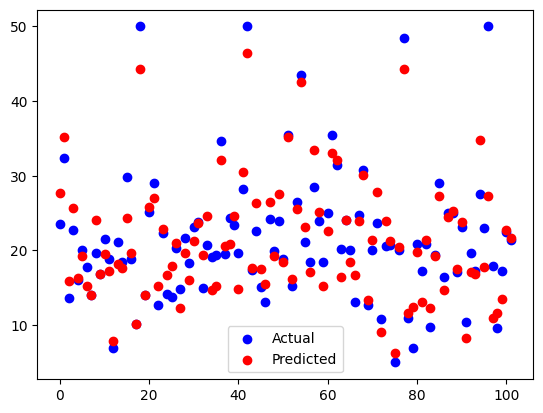

In [2]:
import matplotlib.pyplot as plt
plt.scatter(range(len(y_test)), y_test, color="blue", label="Actual")
plt.scatter(range(len(predictions)), predictions.flatten(), color="red", label="Predicted")
plt.legend()
plt.show()


In [3]:
df.head

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 